In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from matplotlib import pyplot as pt

In [7]:
#I'm assuming first row will be meaningless. If it's not, then remove the skiprow argument
sampleswithlatentvars = pd.read_csv("latent_var_data_final.csv", names=["Latent Var {}".format(i) for i in range(5)], skiprows=1)

In [8]:
print("Any null values? ", sampleswithlatentvars.isnull().values.any())
print(np.min(sampleswithlatentvars['Latent Var 4']))

Any null values?  False
-25.861591339111328


In [9]:
print("SKLearn's estimate for bandwidth: ",estimate_bandwidth(sampleswithlatentvars))

SKLearn's estimate for bandwidth:  21.870385203760165


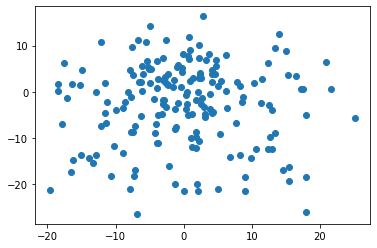

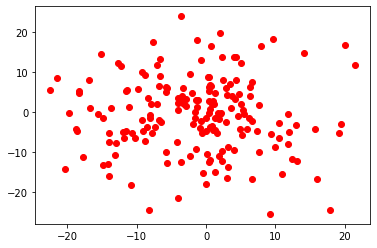

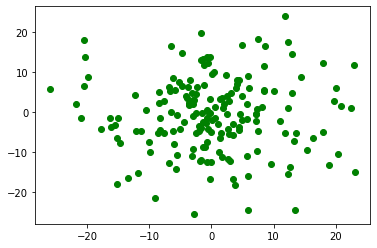

In [10]:
'''
Picking some random pair wise latent variabels to see if any clusters emerge
Maybe there's a way to identify which pair wise variables will show clusters (in 2-D)?
'''

pt.scatter(sampleswithlatentvars.iloc[:,0], sampleswithlatentvars.iloc[:,1])
pt.show()

pt.scatter(sampleswithlatentvars.iloc[:,2], sampleswithlatentvars.iloc[:,3], color='red')
pt.show()

pt.scatter(sampleswithlatentvars.iloc[:,4], sampleswithlatentvars.iloc[:,3], color='green')
pt.show()

In [11]:
'''
SKlearn uses a method to estimate the bandwidth and uses it as the default. As printed above, it comes out to 21.
So I chose an arbitrary number below 21 , since a value of 21 was creating just 1 cluster.
Maybe 1 cluster is the best clustering for given data. I just want to show the trend as you decrease bandwidth.
From online reading, it seems you need some domain knowledge/ experience for choosing the right size for this.

Maybe we can calculate total variance in each cluster, for each bandwidth, 
and choose a value that minimizes that.

Definitely the area that we should explore next
'''
ms = MeanShift(bandwidth = 18)
ms.fit(sampleswithlatentvars)

MeanShift(bandwidth=18, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [12]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [17]:
print(labels)
print(cluster_centers)
sampleswithlatentvars['clusters'] = labels
print(sampleswithlatentvars.head(10))
sampleswithlatentvars.to_csv('labeled_clusters.csv')

[1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 4 1 1 2 1 1 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 0 3 0 0 0 0
 0 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 0 0 3 3 0 0 0
 0 0 0 3 4 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ -0.43233746   1.85708319   0.65172359   0.64235338  -0.80618695]
 [-10.31590061  -7.14682196  -8.98211442   4.59033213  13.22676113]
 [  6.25453689 -17.17006369  -4.71349983 -11.15282049  15.45387225]
 [ 15.47696781 -19.32614326  -4.02200365 -21.43506432  -9.07552719]
 [-13.86597061 -14.35519123   9.19109535 -25.39149857  -2.81540418]]
   Latent Var 0  Latent Var 1  Latent Var 2  Latent Var 3  Latent Var 4  \
0    -11.581592     -4.625837    -12.292809     11.706864      8.416257   
1    -16.491993    -17.368090     -6.582067     13.396480     -1.263789   
2    -17.783985     -6.874804    -15.522555     -0.432459      7.2

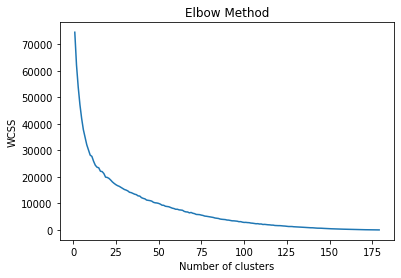

In [14]:
'''
The following script takes time if the MAXCLUSTERS value is high, like 180 (the max value).
Commenting it out in case you want to run the whole script
'''
wcss = []
MAXCLUSTERS = 180
for i in range(1, MAXCLUSTERS):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sampleswithlatentvars)
    wcss.append(kmeans.inertia_)
pt.plot(range(1, MAXCLUSTERS), wcss)
pt.title('Elbow Method')
pt.xlabel('Number of clusters')
pt.ylabel('WCSS')
pt.show()

In [15]:
'''
From the graph, when the number of clusters chosen is around 10, the rate of decrease of WCSS drops sharply,
which is the elbow point. That's considered a meaningful place to stop.

Note, at a certain point, having more clusters is just meaningless. The extreme end of that is having as many
clusters as data points, which will WCSS of 0, but it's absolutely meaningless.
(The algorithm will converge to that if you let sufficient number of iterations)
'''

"\nFrom the graph, when the number of clusters chosen is around 10, the rate of decrease of WCSS drops sharply,\nwhich is the elbow point. That's considered a meaningful place to stop.\n\nNote, at a certain point, having more clusters is just meaningless. The extreme end of that is having as many\nclusters as data points, which will WCSS of 0, but it's absolutely meaningless.\n(The algorithm will converge to that if you let sufficient number of iterations)\n"